# TP Advanced Optimisation : Algorithme optimisation stochastique

### Question 1 : Énoncé du problème d'optimisation stochastique

 **Problème d'optimisation :**

Nous cherchons à minimiser une fonction de coût définie comme une espérance :

$$
f(x) = \mathbb{E}[F(x, \xi)],
$$

On définit notre fonction cible par $$ F(x, \xi) = (x - \xi)^2 + \sin(x - \xi) + e^{-\xi}(x^2 - 2x + 1) $$  où  $ \xi $ suit une loi normale $ \xi \sim \mathcal{N}(\mu, \sigma^2) $.

La solution théorique $ x^* $ correspond au point où $ f(x) $ atteint son minimum.

Por cela nous utilisons l'algorithme SGD pour que le gradient soit approximé en utilisant des échantillons aléatoires de $ \xi $.


Le gradient stochastique est donné par :

$$ \nabla F(x, \xi) = 2(x - \xi) + \cos(x - \xi) + e^{-\xi}(2x - 2) $$


À chaque itération $ n $, la valeur de $ x $ est mise à jour selon la formule :

$ x_{n+1} = x_n - \gamma_n \nabla F(x_n, \xi_n), $

où :

- $ \gamma_n $ est un pas d'apprentissage ,
- $ \xi_n $ est un échantillon indépendant de la variable aléatoire $ \xi $.

Paramètres qui satisfont les hypothèses de convergence de Robbins-Siegmund cad : 

où $\gamma_n > 0$ est une séquence décroissante vérifiant :

$$
\sum_{n=1}^\infty \gamma_n = \infty, \quad \sum_{n=1}^\infty \gamma_n^2 < \infty 
$$


---

**Objectif :**  
- Approcher $ x^* $ par l'algorithme,
- Analyser la convergence, visuellement et mathématiquement.


---

Ici on pose :

 $\gamma_n= \gamma_0/(1+n^\alpha)$

 donc $ \alpha \in [0.5, 1]$

et $\mu=2, \sigma =1, \alpha=0.7$

$ N_0 = 1000 $ itérations.

In [65]:
import numpy as np
import matplotlib.pyplot as plt

#### Analyse du comportement de $f(x)$ :

Nous allons approximer $f(x)$ par une moyenne empirique afin de visualiser la forme globale de $f(x)$: et d'identifier les minimas locaux ou globaux : 

$$
f(x) \approx \frac{1}{N} \sum_{i=1}^{N} F(x, \xi_i),
$$

où $\xi_i \sim \mathcal{N}(\mu, \sigma^2)$.


---

Approximons $\nabla f(x)$ par :

$$
\nabla f(x) \approx \frac{1}{N} \sum_{i=1}^{N} \nabla F(x, \xi_i).
$$

Le zéro du gradient correspondra aux points critiques.

---

Simuler plusieurs valeurs de $\xi$ pour observer la variance du gradient stochastique et la difficulté d'approximation pour SGD. :

$$
\text{Var}(\nabla F(x, \xi)).
$$


En fixant $\xi$ à certaines valeurs typiques ($\mu$, $\mu \pm \sigma$, $\mu \pm 2\sigma$), étudier le comportement de $F(x, \xi)$ pour comprendre les interactions entre $x$ et $\xi$.


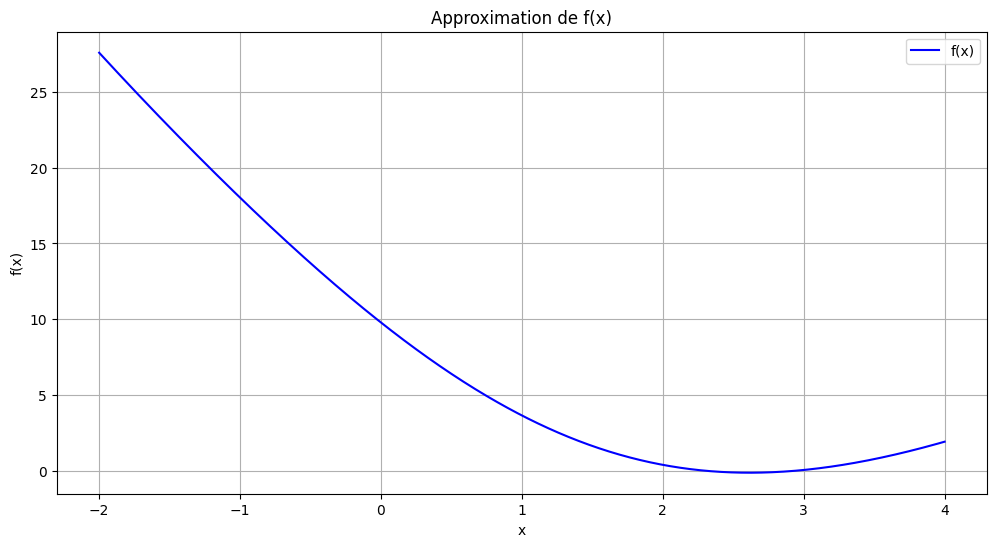

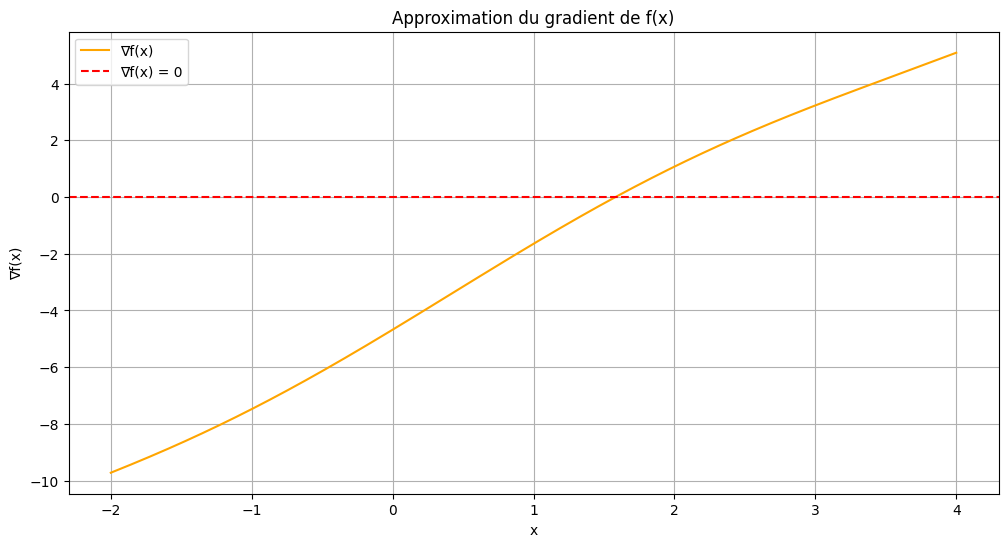

In [66]:
mu, sigma = 2, 1
N0 = 10000
x_range = np.linspace(-2, 4, 500)

# Fonction de perte
def F(x, e):
    return (x - e)**2 + np.sin(x - e) + np.exp(-e) * (x**2 - 2*x + 1)

# Gradient de la fonction
def gradient(x, e):
    return 2 * (x - e) + np.cos(x - e) + 2 * np.exp(-e) * (x - 1)

# Simuler des échantillons de e
e_samples = np.random.normal(mu, sigma, N0)

# Calcul de f(x) et du gradient
f_values = [np.mean([F(x, e) for e in e_samples]) for x in x_range]
grad_values = [np.mean([gradient(x, e) for e in e_samples]) for x in x_range]

# Tracer f(x)
plt.figure(figsize=(12, 6))
plt.plot(x_range, f_values, label="f(x)", color="blue")
plt.title("Approximation de f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.show()

# Tracer le gradient
plt.figure(figsize=(12, 6))
plt.plot(x_range, grad_values, label="∇f(x)", color="orange")
plt.axhline(0, color="red", linestyle="--", label="∇f(x) = 0")
plt.title("Approximation du gradient de f(x)")
plt.xlabel("x")
plt.ylabel("∇f(x)")
plt.grid()
plt.legend()
plt.show()


Il semble y avoir un unique min global dans l'approximation de f qui correspond bien avec les points critiques de $\nabla f(x)$.

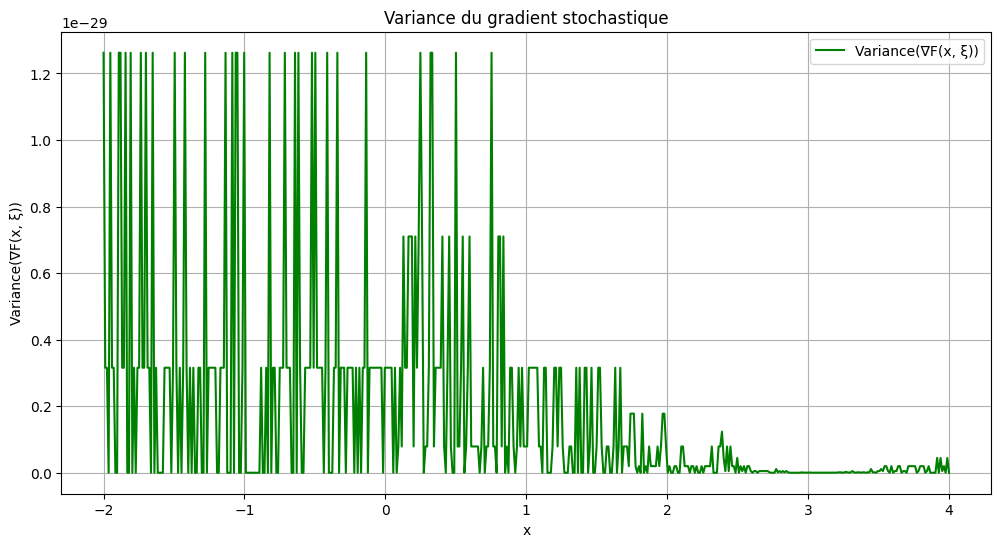

In [67]:
# Calcul de la variance du gradient
gradient_var = [np.var([gradient(x, xi) for e in e_samples]) for x in x_range]

# Tracer la variance
plt.figure(figsize=(12, 6))
plt.plot(x_range, gradient_var, label="Variance(∇F(x, ξ))", color="green")
plt.title("Variance du gradient stochastique")
plt.xlabel("x")
plt.ylabel("Variance(∇F(x, ξ))")
plt.grid()
plt.legend()
plt.show()


La tendance vers 0 de la variance à la fin de l'optimisation peut être un signe positif, indiquant que l'algorithme commence à se stabiliser à mesure que 
$x$ se rapproche du minimum. La variance oscille beaucoup mais reste relativement petite et bornée entre 0 et 1.3.

#### Algorithme SGD : 

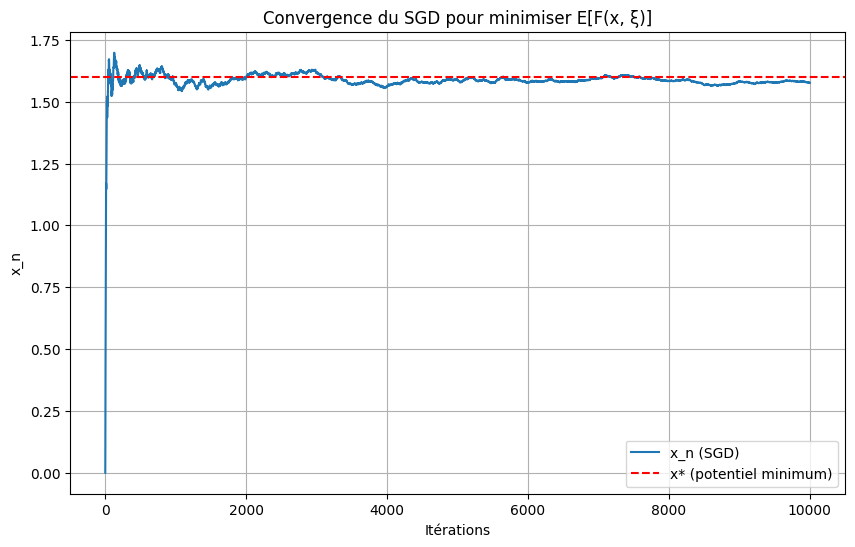

In [68]:
# Paramètres

gamma_0 = 0.1  # Pas initial
alpha = 0.7  # Exposant pour la décroissance du pas


# Séquence gamma_n
def gamma(n):
    return gamma_0 / (1 + n**alpha)

# Initialisation
x = 0  # Point de départ
x_values = [x]  # Stocker les valeurs de x

# Descente de gradient stochastique
for n in range(1, N0 + 1):
    e = np.random.normal(mu, sigma)  # Échantillon de e
    grad = gradient(x, e)  # Calcul du gradient
    x = x - gamma(n) * grad  # Mise à jour
    x_values.append(x)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(x_values, label="x_n (SGD)")
plt.axhline(y=1.6, color="r", linestyle="--", label="x* (potentiel minimum)")
plt.title("Convergence du SGD pour minimiser E[F(x, ξ)]")
plt.xlabel("Itérations")
plt.ylabel("x_n")
plt.legend()
plt.grid()
plt.show()


L'algorithme semble bien converger vers un potentiel minimum

### Question 2 : Analyse et Illustration de la convergence

Nous allons étudier l'analyse de la convergence du SGD en s'appuyant sur le théorème de Robbins-Siegmund.

Le théorème s'applique à une suite aléatoire $(Y_n)$ satisfaisant l'itération :

$$
Y_{n+1} = Y_n - \gamma_{n+1} \nabla F(Y_n, Z_{n+1}),
$$

où $\gamma_n > 0$ est une séquence décroissante vérifiant :

$$
\sum_{n=1}^\infty \gamma_n = \infty, \quad \sum_{n=1}^\infty \gamma_n^2 < \infty.
$$

Sous certaines hypothèses sur $F(Y, Z)$ (croissance contrôlée, régularité) et $L(Y)$ (fonction de Lyapunov), le théorème garantit que :

1. Les différences $\|Y_{n+1} - Y_n\| \to 0$ presque sûrement.
2. La suite $L(Y_n)$ converge presque sûrement vers une valeur limite $L_\infty$.

---

Dans notre cas :

- $Y_n = x_n$,
- $\gamma_n$ est le pas d'apprentissage.

Dans le cadre de la descente de gradient stochastique (SGD), nous pouvons utilisée une fonction de Lyapunov spécifique pour mesurer la convergence du point $x_n$ vers $x^*$ :

$$
L(x_n) = \frac{1}{2} (x_n - x^*)^2
$$


Nous allons visualiser la convergence de $x_n \to x^*$ en traçant $L(x_n)$ au cours des itérations.


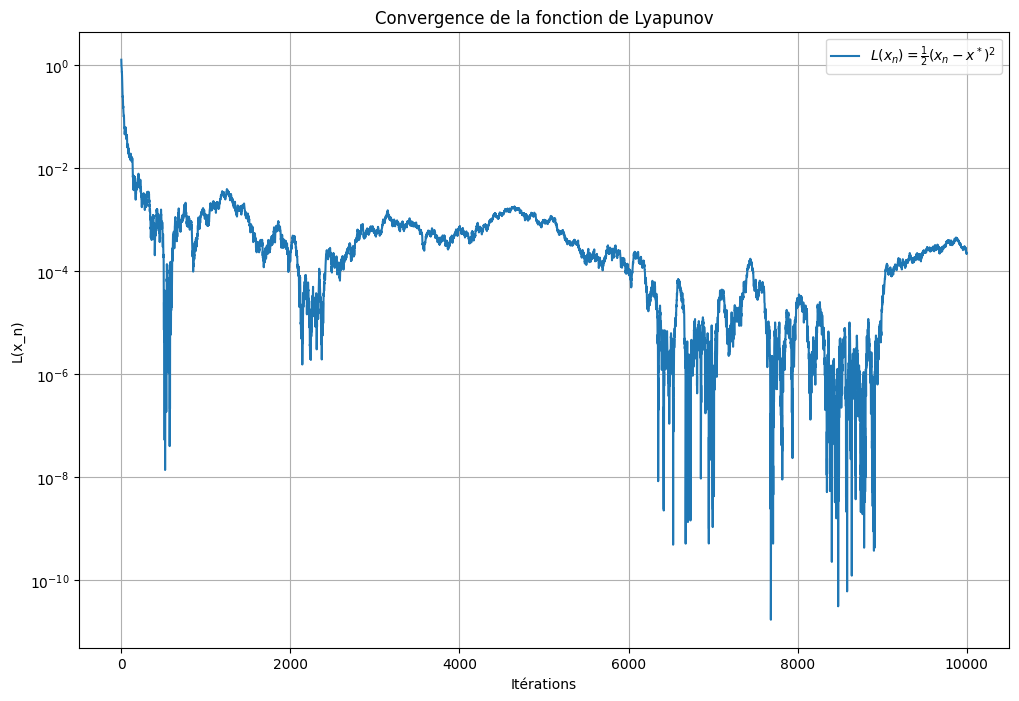

In [69]:
# Fonction de Lyapunov
def lyapunov(x, x_star):
    return 0.5 * (x - x_star)**2

# Initialisation
x = 0  # Point de départ
x_star = 1.6  # Minimum théorique
x_values = [x]  # Stocker les valeurs de x
lyapunov_values = [lyapunov(x, x_star)]  # Stocker L(x_n)

# Descente de gradient stochastique
for n in range(1, N0 + 1):
    e = np.random.normal(mu, sigma)  # Échantillon de xi
    grad = gradient(x, e)  # Gradient stochastique
    x = x - gamma(n) * grad  # Mise à jour
    x_values.append(x)
    lyapunov_values.append(lyapunov(x, x_star))

# Visualisation de L(x_n)
plt.figure(figsize=(12, 8))
plt.plot(lyapunov_values, label=r"$L(x_n) = \frac{1}{2}(x_n - x^*)^2$")
plt.title("Convergence de la fonction de Lyapunov")
plt.xlabel("Itérations")
plt.ylabel("L(x_n)")
plt.yscale("log")  # Échelle logarithmique pour observer la décroissance
plt.legend()
plt.grid()
plt.show()

Comme prévu par le théorème de Robbins-Siegmund, nous observons que la fonction de Lyapunov décroît exponentiellement dès les premières itérations, indiquant que les différences $\|x_{n+1} - x_n\|$ tendent vers zéro presque sûrement. 

Cela confirme la convergence de l'algorithme SGD vers le minimum théorique.


### Question 3 : Rate of convergence

Soit la formule pour les calculs du taux d'erreur total  :

$$
\frac{1}{\Gamma\left(1 + CL \gamma_k^2\right)} 
\left( 
CL \sum_{k \geq n+2} \gamma_k^2 + 
\frac{CL \gamma_{n+1}^2}{1 + CL \gamma_{n+1}^2}
\right)
$$

avec 
- **Constantes $CL$** : Une constante positive
- **Le Terme** :  
  $$
  \frac{CL \gamma_{n+1}^2}{1 + CL \gamma_{n+1}^2}
  $$
  Ce terme mesure l'impact immédiat du bruit stochastique pour l'itération $n+1$.  
- **Ce 2ème terme :**  
  $$
  CL \sum_{k \geq n+2} \gamma_k^2
  $$
  Cela représente l'effet cumulé des itérations futures sur l'erreur résiduelle ou le taux de convergence.

Ces éléments permettent d'évaluer l'erreur résiduelle ou le taux de convergence de $Y_n$ vers $y^*$, en tenant compte des contributions immédiates ($n+1$) et futures ($k \geq n+2$).


---

On choisit une séquence $\gamma_n$ qui satisfait les conditions du théorème de Robbins-Siegmund, cad $\sum_{n=1}^\infty \gamma_n = \infty, \quad \sum_{n=1}^\infty \gamma_n^2<\infty$, et $E[\varepsilon_n^2] \leq C \gamma_n^2, \quad \text{avec } C > 0.$:  
   $$
   \gamma_n = \frac{1}{n^\alpha}, \quad \text{où } \alpha \in [0.5, 1].
   $$
avec,
- $\alpha = 0.7$
- CL = 1.0


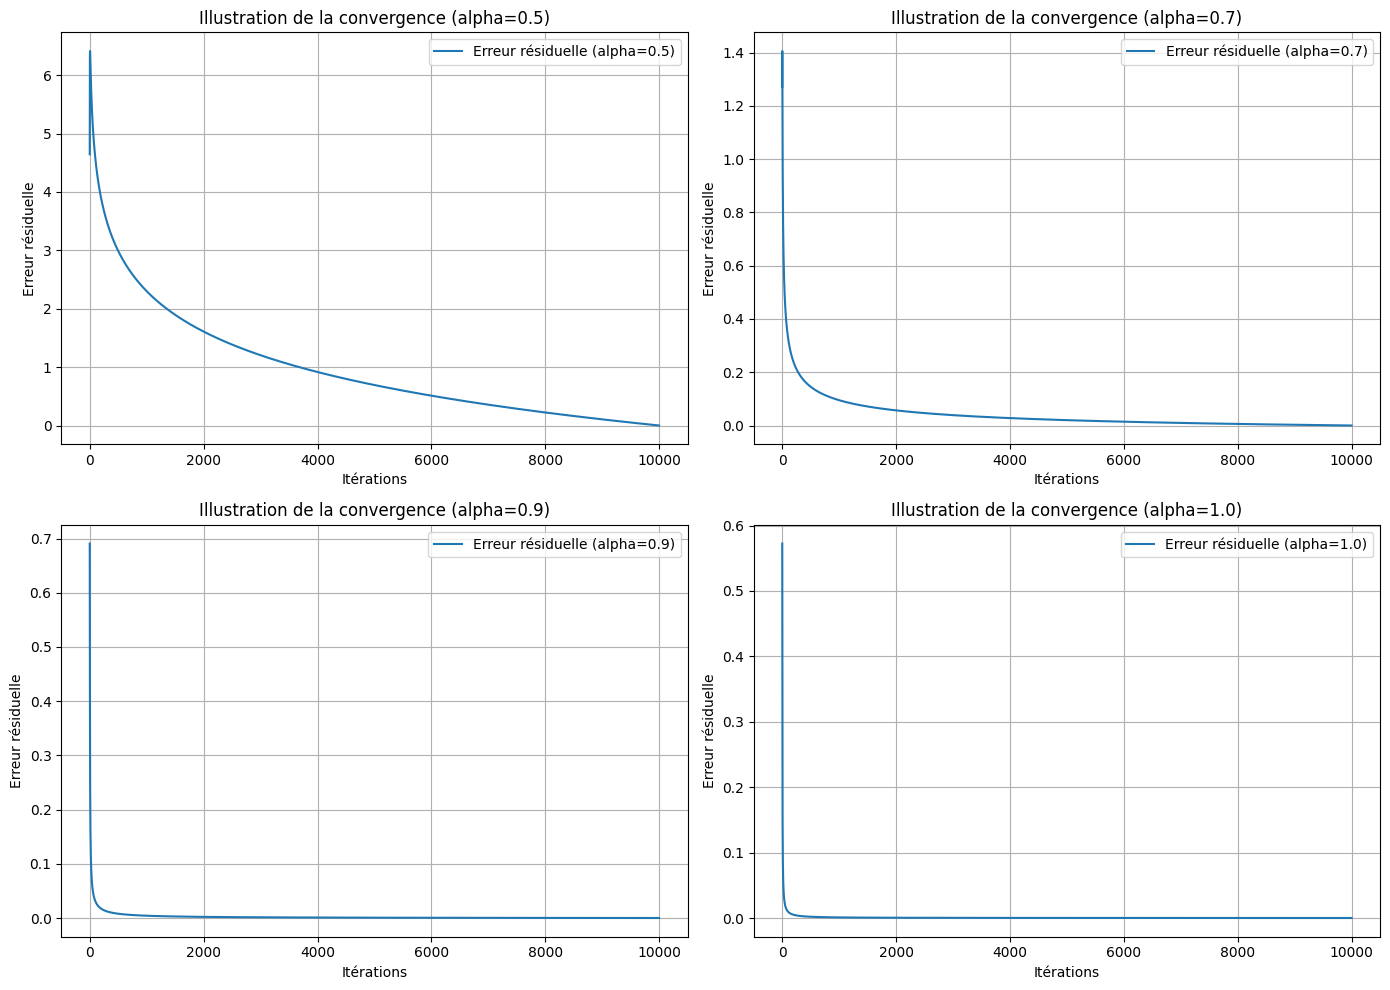

In [70]:

CL = 1.0  # Constante CL

alpha = [0.5, 0.7, 0.9, 1.0]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, alpha in enumerate(alpha):
    gamma_n = lambda n: 1 / (n**alpha)
    gammas = np.array([gamma_n(n) for n in range(1, N0+1)])
    T_1 = np.array([np.sum(gammas[n+1:]**2) for n in range(N0-1)])
    T_2 = np.array([CL * gammas[n]**2 / (1 + CL * gammas[n]**2) for n in range(N0-1)])
    errors = 1 / (1 + CL * gammas[:N0-1]**2) * (CL * T_1 + T_2)
    
    ax = axs[i // 2, i % 2]
    ax.plot(errors, label=f'Erreur résiduelle (alpha={alpha})')
    ax.set_xlabel("Itérations")
    ax.set_ylabel("Erreur résiduelle")
    ax.set_title(f"Illustration de la convergence (alpha={alpha})")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()



Le taux de croissance dépend du paramètre $\alpha$.
En effet La série suivante $\sum_{k=1}^\infty \gamma_k \quad \text{avec} \quad \gamma_k = \frac{1}{k^\alpha}$ diverge pour $\alpha \leq 1$

Et pour $\sum_{k=1}^\infty \gamma_k^2$, elle converge toujours pour $\alpha > \frac{1}{2}$, donc $\alpha \in [\frac{1}{2}, 1]$.

Ici on peut voir que plus $\alpha $ est proche de 1, plus la convergence est rapide.

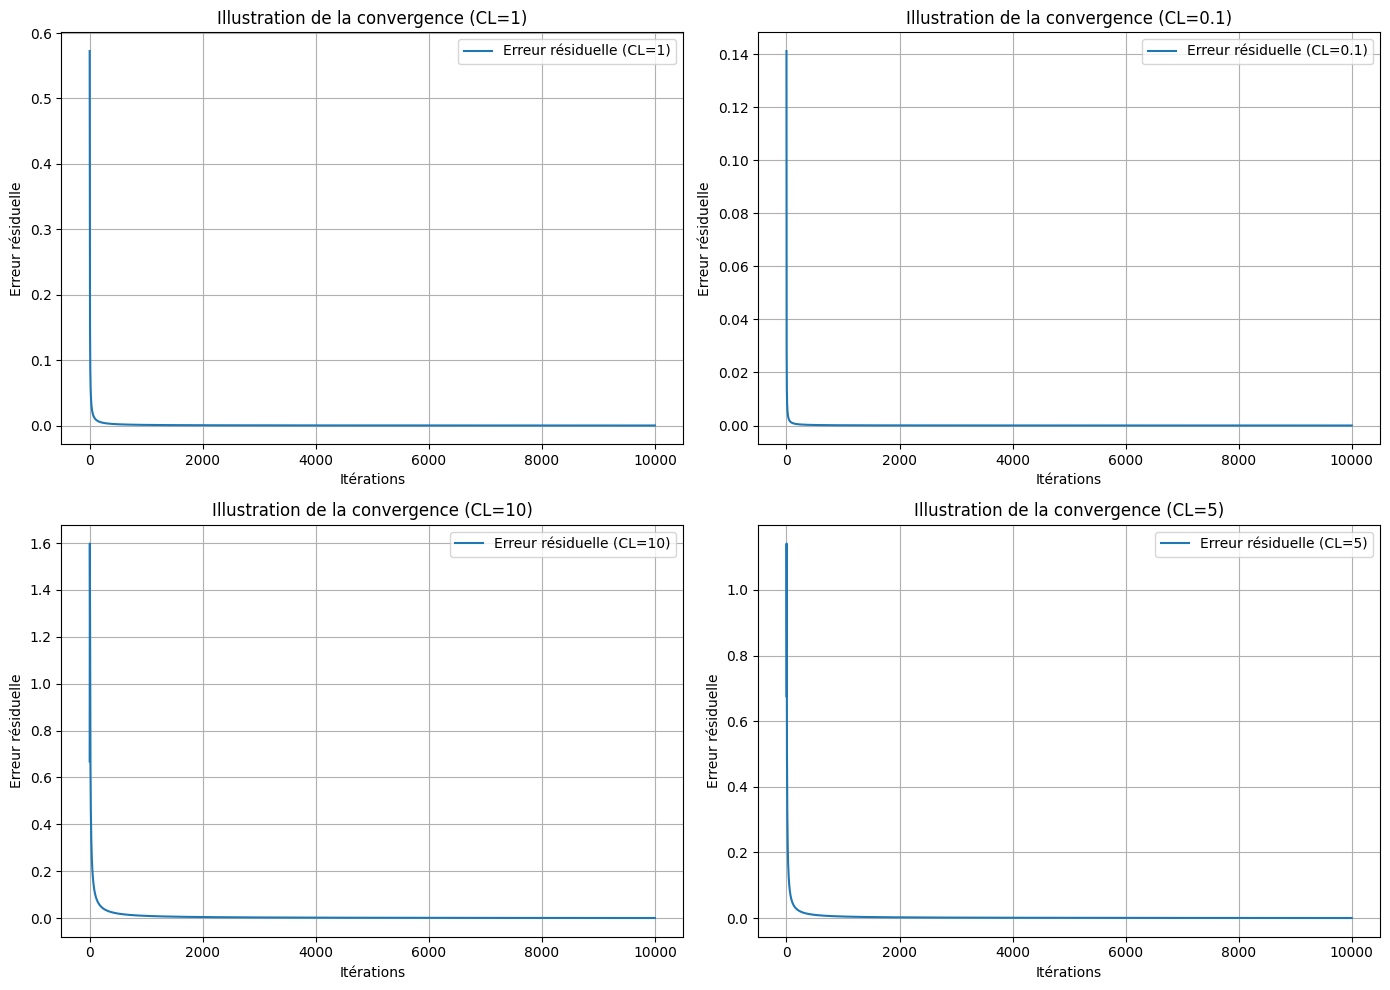

In [71]:
CL_values = [1, 0.1, 10, 5]
alpha = 1.0
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, CL in enumerate(CL_values):
    gamma_n = lambda n: 1 / (n**alpha)
    gammas = np.array([gamma_n(n) for n in range(1, N0+1)])
    T_1 = np.array([np.sum(gammas[n+1:]**2) for n in range(N0-1)])
    T_2 = np.array([CL * gammas[n]**2 / (1 + CL * gammas[n]**2) for n in range(N0-1)])
    errors = 1 / (1 + CL * gammas[:N0-1]**2) * (CL * T_1 + T_2)
    
    ax = axs[i // 2, i % 2]
    ax.plot(errors, label=f'Erreur résiduelle (CL={CL})')
    ax.set_xlabel("Itérations")
    ax.set_ylabel("Erreur résiduelle")
    ax.set_title(f"Illustration de la convergence (CL={CL})")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

On choisit $CL=1$ car il ne pénalise ni ne favorise excessivement le bruit.

Le graphique montre l'évolution du taux de convergence à chaque itération. Il doit tendre vers 0 au fur et à mesure que l'on progresse dans les itérations, indiquant une amélioration de la précision de l'approximation à mesure que le nombre d'itérations augmente.

### Question 4 : 

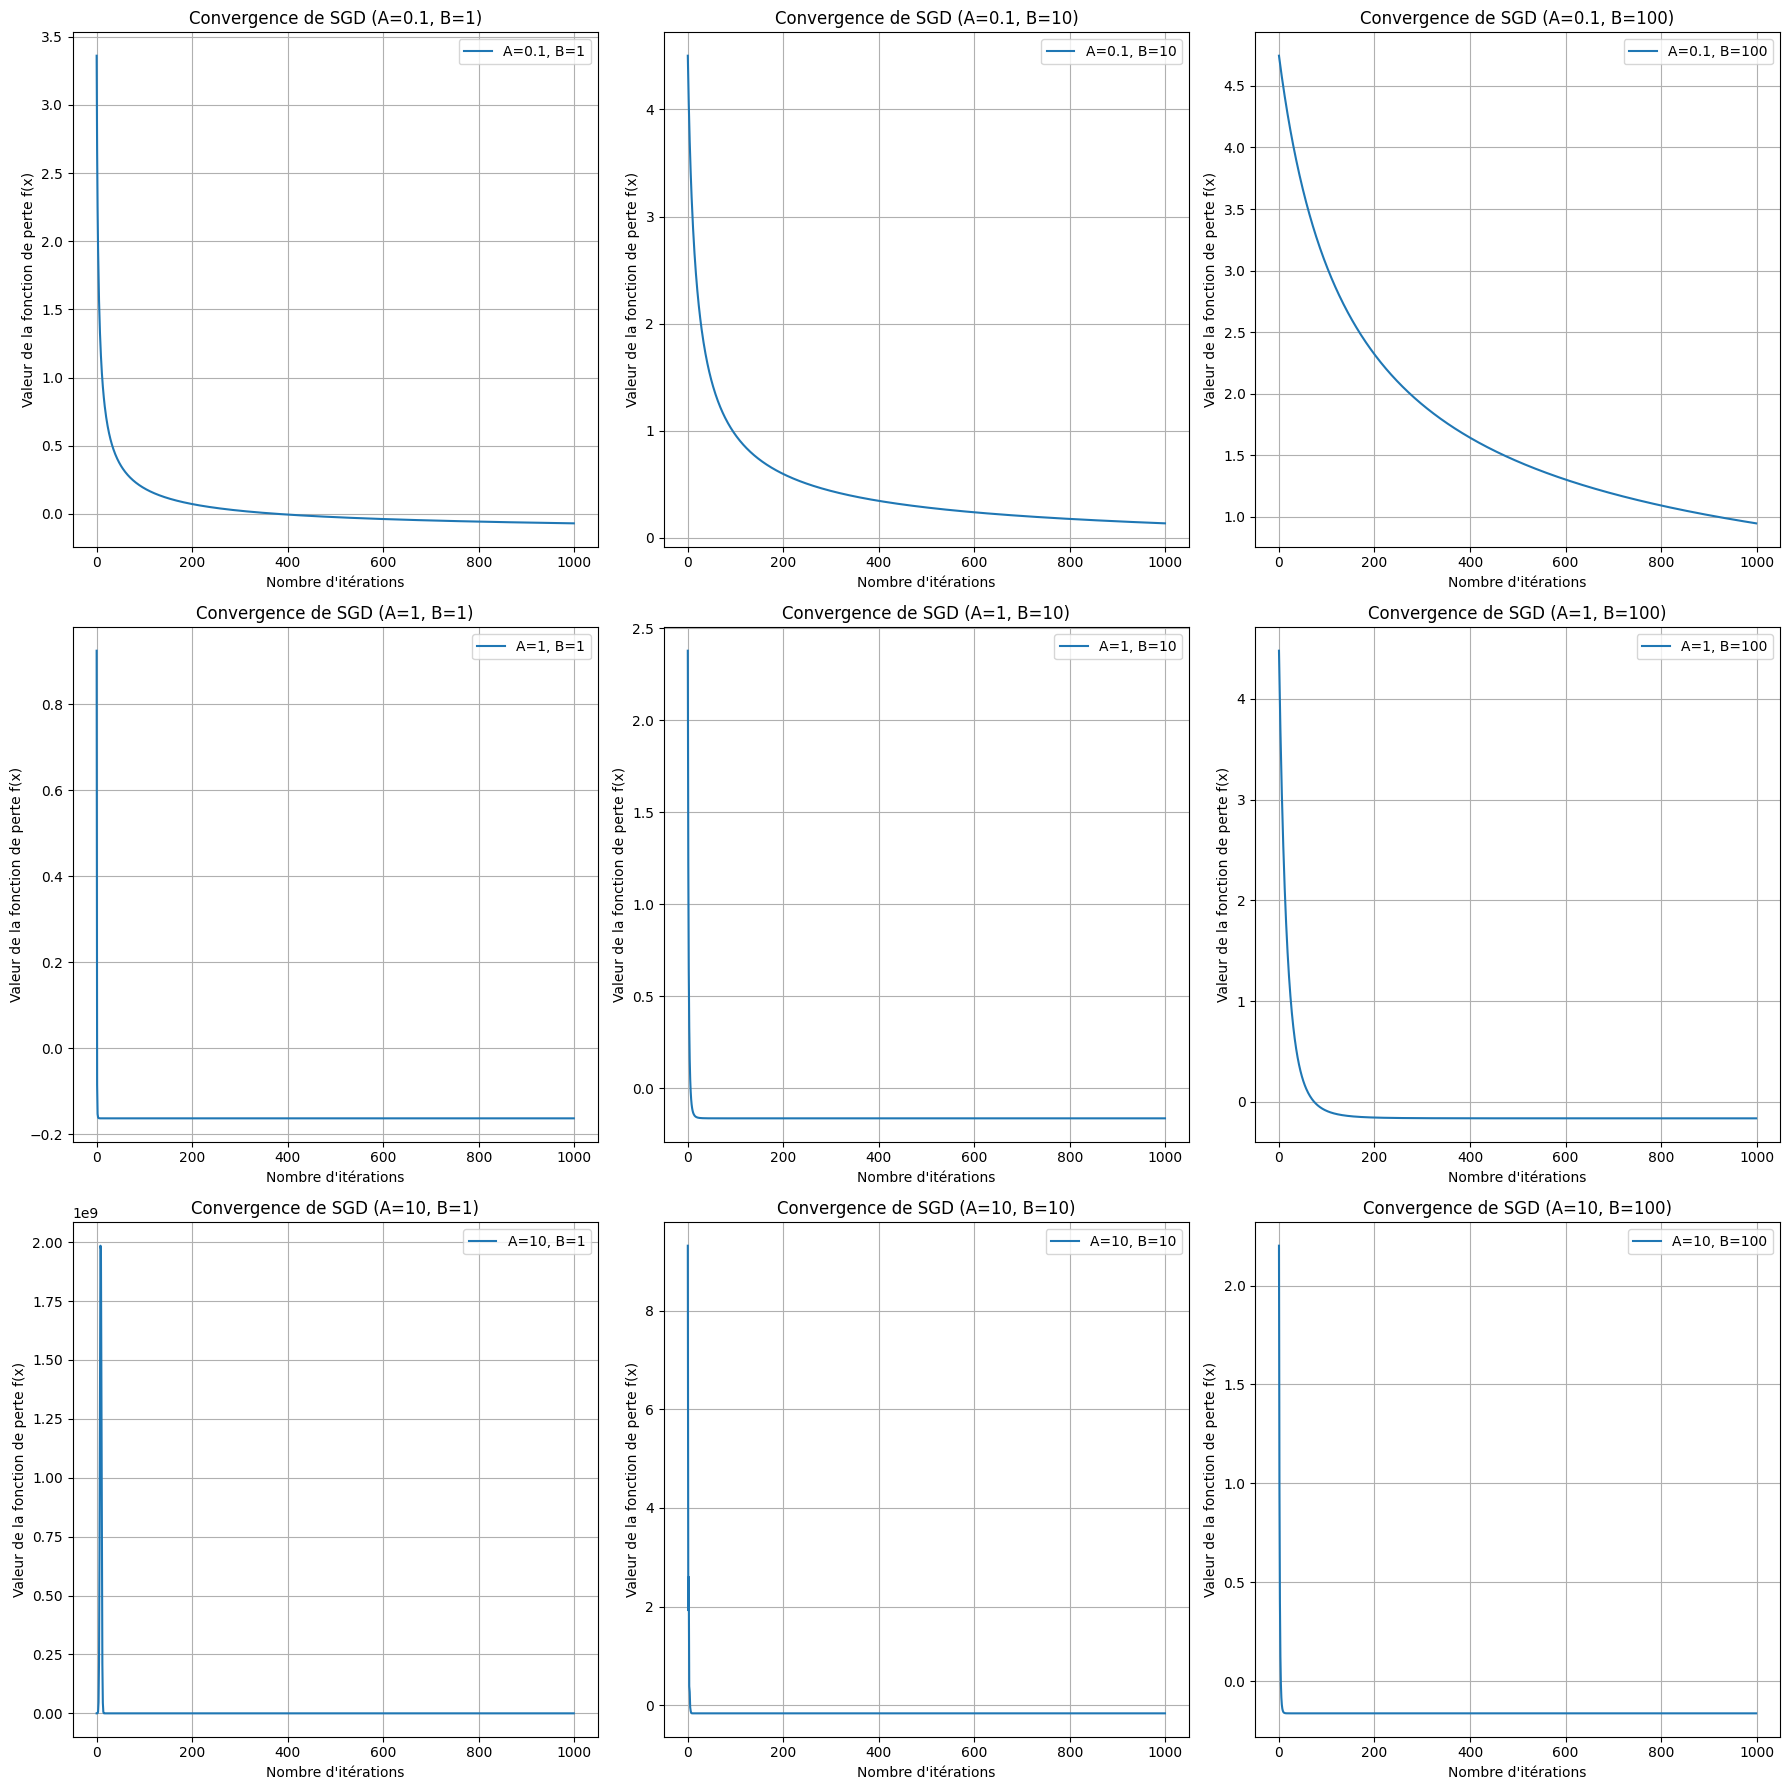

In [72]:

# Implémentation du SGD avec la séquence gamma_n = A / (B + n^alpha)
def sgd(alpha, A=1, B=10, n_iterations=1000):
    # Initialisation
    e = np.random.randn()  
    history = []  #stockage évolution de la fonction de perte
    x = 0  
    x_star = 1.6  # Minimum théorique
    x_values = [x]  # Stocker les valeurs de x

    # Descente de gradient
    for n in range(1, n_iterations + 1):
        gamma_n = A / (B + n**alpha)  
        grad = gradient(x,e)  
        x = x - gamma_n * grad 
        history.append(F(x))  # Stockage de la valeur de la fonction de perte
    
    return x, history


# Affichage de la convergence pour différentes valeurs de A et B
A_values = [0.1, 1, 10]
B_values = [1, 10, 100]
n_iterations = 1000

fig, axs = plt.subplots(3, 3, figsize=(18, 18))

for i, A in enumerate(A_values):
    for j, B in enumerate(B_values):
        x = 0  
        history = []  
        
        for n in range(1, n_iterations + 1):
            gamma_n = A / (B + n**alpha)  
            grad = gradient(x, e)  
            x = x - gamma_n * grad  
            history.append(F(x, e))  # Stockage de la valeur de la fonction de perte
        
        ax = axs[i, j]
        ax.plot(history, label=f'A={A}, B={B}')
        ax.set_xlabel("Nombre d'itérations")
        ax.set_ylabel("Valeur de la fonction de perte f(x)")
        ax.set_title(f'Convergence de SGD (A={A}, B={B})')
        ax.legend()
        ax.grid()

plt.tight_layout()
plt.show()

Le cas avec A=1 et B=1 semble le choix idéal.